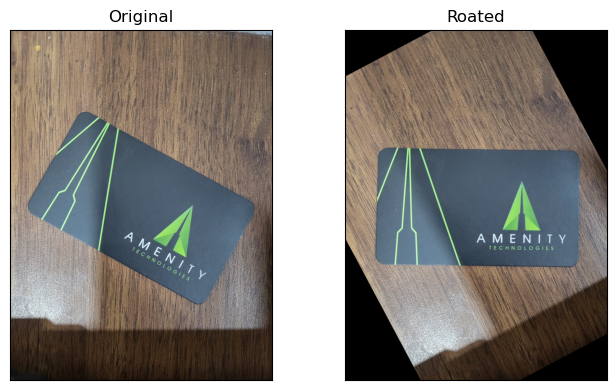

In [ ]:
# import cv2 as cv
# import matplotlib.pyplot as plt

# img = cv.imread('card2.jpeg')
# img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# center = (img_rgb.shape[1] // 2, img_rgb.shape[0] // 2)
# angle = 28
# scale = 1
# rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
# rotate_img = cv.warpAffine(img_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

# fig, axs = plt.subplots(1, 2, figsize=(7,4))
# axs[0].imshow(img_rgb)
# axs[0].set_title("Original")
# axs[1].imshow(rotate_img)
# axs[1].set_title("Roated")
# for ax in axs:
#     ax.set_xticks([])
#     ax.set_yticks([])

# plt.tight_layout()
# plt.show()

29.99023502506025


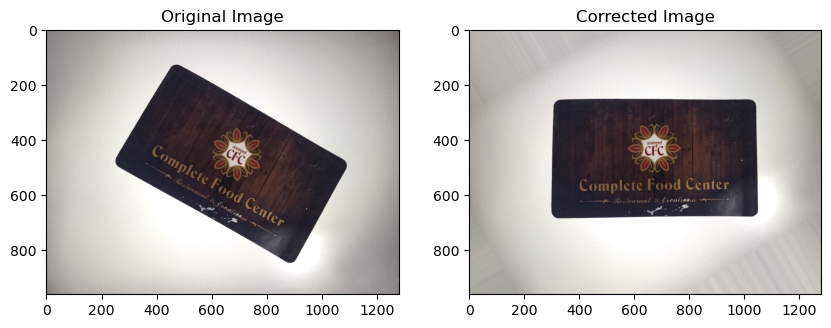

In [ ]:
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('img4.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gry = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# h, w = img_gry.shape[:2]
edges = cv.Canny(img_rgb, 250, 250, apertureSize=3)
lines = cv.HoughLines(edges, 2, np.pi/90, 280)

angles = []
rota_ang = []
for r_theta in lines:
    # storing theta values of lines 
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    
    # store theta values in a and b
    a = np.cos(theta)
    b = np.sin(theta)
    
    # stores value of rcos and rsin
    X0 = a*r
    Y0 = b*r

    # stores the round off values high coordinates
    X1 = int(X0 + 1000 *(-b))
    Y1 = int(Y0 + 1000 *(a))
    
    # sotre the the round off values - low coordinates
    X2 = int(X0 - 1000 *(-b))
    Y2 = int(Y0 - 1000 *(a))
    
    
    lines_coor = np.array([[X1, Y1, X2, Y2]])
    
    angle_rad = math.atan2(Y2 - Y1, X2 - X1)
    angle_deg = math.degrees(angle_rad)
    
    angles.append(angle_deg)
    # print(angle_deg)
    
    # cv.line(img, (X1, Y1), (X2, Y2), (0, 0, 255), 2)

# print(angles)
angle_deg=max(angles)
    
print(angle_deg)
(h, w) = img.shape[:2]

center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle_deg, 1.0)
rotated = cv.warpAffine(img_rgb, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[1].imshow(rotated)
axes[1].set_title('Corrected Image')
plt.show()

0 0
0 1279
957 1279
959 0
951 1271
952 1270
953 1270
954 1271
953 1272
952 1272
431 1071
432 1070
433 1071
433 1072
432 1073
431 1072
421 1048
410 1062
407 1063
403 1070
399 1074
397 1074
395 1071
399 1066
400 1068
400 1065
404 1061
405 1058
417 1046
458 1036
459 1037
459 1039
458 1040
457 1039
457 1037
487 1017
496 1028
494 1045
481 1055
468 1054
471 1067
463 1081
455 1085
442 1084
436 1079
432 1068
435 1055
442 1048
461 1046
458 1044
459 1029
468 1018
475 1015
456 1063
455 1063
455 1064
449 1053
449 1055
444 1055
439 1059
438 1069
445 1078
455 1079
463 1075
467 1066
465 1060
457 1054
461 1058
462 1064
457 1070
450 1069
453 1073
449 1077
442 1069
443 1065
448 1062
449 1057
455 1055
454 1053
439 1072
440 1071
441 1071
442 1072
441 1073
440 1073
439 1070
440 1069
441 1070
440 1071
438 1068
439 1067
440 1068
440 1069
439 1070
438 1069
441 1063
442 1062
443 1063
443 1064
442 1065
441 1064
463 1049
464 1050
481 1021
479 1023
474 1022
473 1026
472 1024
469 1027
467 1027
464 1031
464 1035
46

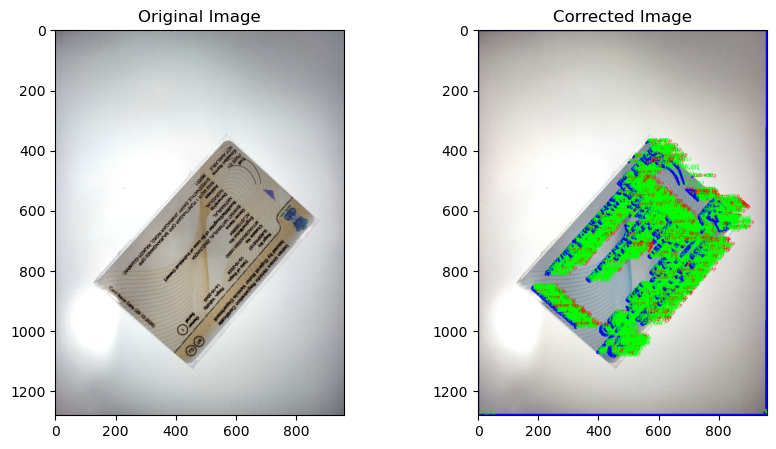

In [295]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

font = cv.FONT_HERSHEY_COMPLEX


img = cv.imread('img1.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gry = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# binary image
_, threshold = cv.threshold(img_gry, 110, 255, cv.THRESH_BINARY)


# find contours
contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    # approximate and draw contour
    approx = cv.approxPolyDP(cnt, 0.009 * cv.arcLength(cnt, True), True)
    cv.drawContours(img_rgb, [approx], 0, (0, 0, 255), 5)
    
    n = approx.ravel()
    i = 0
    for j in n:
        if i % 2 == 0:
            x, y = n[i], n[i + 1]
            coord = f"{x} {y}"
            print(coord)
            if i == 0:
                cv.putText(img_rgb, "Arrow tip", (x, y), font, 0.5, (255, 0, 0))
            else:
                cv.putText(img_rgb, coord, (x, y), font, 0.5, (0, 255, 0))
        i += 1



(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, rotation_angle, 1.0)
rotated = cv.warpAffine(img_rgb, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)    







fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)

axes[0].set_title('Original Image')
axes[1].imshow(img_rgb)
axes[1].set_title('Corrected Image')
plt.show()

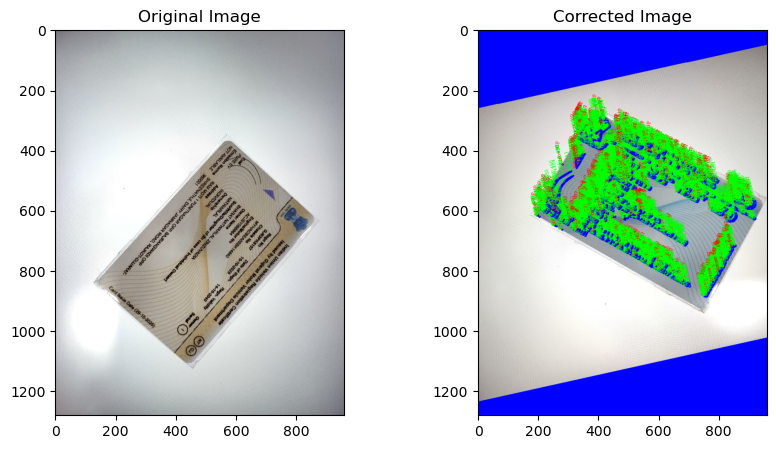

In [235]:
import math
import cv2 as cv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
img = cv.imread('img1.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

edges = cv.Canny(img_rgb, 150, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/90, 280)

angles = []
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr

    a = np.cos(theta)
    b = np.sin(theta)
    
    X0 = a*r
    Y0 = b*r

    X1 = int(X0 + 1000 *(-b))
    Y1 = int(Y0 + 1000 *(a))
    
    X2 = int(X0 - 1000 *(-b))
    Y2 = int(Y0 - 1000 *(a))
    
    # angle_rad = math.atan2(Y2 - Y1, X2 - X1)
    # angle_deg = math.degrees(angle_rad)
    
    # if abs(angle_deg) > 45 :
    #     angle_deg = (90 - abs(angle_deg)) * np.sign(angle_deg)
    
    # angles.append(angle_deg)
# print(angles)
# med_ang = np.median(angles) * np.pi / 180
# print(med_ang)

# (h, w) = img.shape[:2]
# center = (w // 2, h // 2)
# M = cv.getRotationMatrix2D(center, med_ang, 1.0)
# rotated = cv.warpAffine(img, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(rotated)
axes[1].set_title('Corrected Image')
plt.show()

In [1]:
# Source - https://stackoverflow.com/a/60384108
# Posted by nathancy
# Retrieved 2026-01-08, License - CC BY-SA 4.0

import cv2
import numpy as np

# Load image, grayscale, Otsu's threshold 
image = cv2.imread('card1.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = 255 - gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Compute rotated bounding box
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
print(angle)

# Rotate image to deskew
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2.imshow('thresh', thresh)
cv2.imshow('rotated', rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()


-90.0


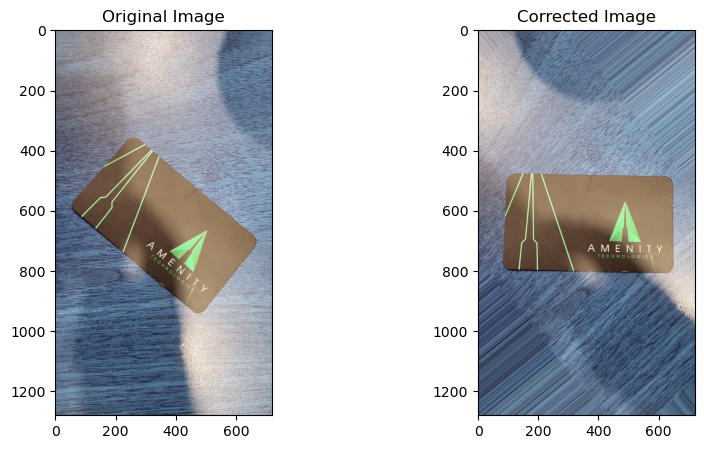

In [231]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deskew import determine_skew
# from scipy.ndimage import interpolation as inter
# from scipy.ndimage import rotate

# delta = 1 
# limit = 5

image = cv2.imread('./card4.jpeg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# print(angle)

# scores = []
# angles = np.arange(-limit, limit + delta, delta)

# for angle in angles:
#     data = inter.rotate(thresh, angle, reshape=False, order=0)
#     hist = np.sum(data, axis=1, dtype=float)
#     score = np.sum((hist[1:] - hist[:-1]) ** 2, dtype=float)
#     scores.append(score)

# best_angle = angles[scores.index(max(scores))]
# print(best_angle)

angle = determine_skew(gray)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(rotated)
axes[1].set_title('Corrected Image')
plt.show()